In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('default')

## How long does it take for the video to get trending ?

In [47]:
import pandas as pd
df=pd.read_csv("C:/Users/SaiMahendraReddyAtlu/Downloads/Videos1.csv")

In [6]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time']=df['publish_time'].map(lambda x: x.split('T')[0])
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%d')

In [25]:
df['days_to_trend']=df['trending_date']-df['publish_time']

In [15]:
df['days_to_trend'] = df['days_to_trend'].dt.days

In [16]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,4
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,5


In [44]:
df['days_to_trend'].describe()

count                         40881
mean      3 days 11:33:21.174139575
std      59 days 17:39:47.737220210
min                 0 days 00:00:00
25%                 1 days 00:00:00
50%                 1 days 00:00:00
75%                 2 days 00:00:00
max              3658 days 00:00:00
Name: days_to_trend, dtype: object

On an average It takes 3 days for a video to get trended.

## How is this duration changes across the two years ?

Text(0, 0.5, 'Number of days to get Trending')

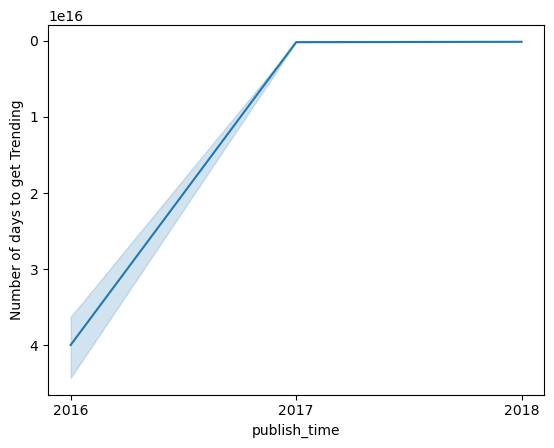

In [49]:
sns.lineplot(x=df2['publish_time'].dt.year,y=df2['days_to_trend'])
plt.xticks([2016,2017,2018])
plt.ylabel('Number of days to get Trending')

## Channels having multiple trending videos and how many times?¶

In [23]:
counts_by_channel = df.groupby('channel_title')['channel_title'].count()
multi_trending_channels = counts_by_channel[counts_by_channel > 1].sort_values(ascending=False)
print(multi_trending_channels)

channel_title
SET India             192
MSNBC                 189
FBE                   188
The Young Turks       186
REACT                 183
                     ... 
TV NL                   2
Get Into Film           2
GenoSamuel2             2
Gefari Productions      2
The Best Fails          2
Name: channel_title, Length: 3382, dtype: int64


SET India is the top Youtube channel having multiple trending videos more times.

## Analysis around likes, views, comments, etc 

              views         likes      dislikes  comment_count
count  4.088100e+04  4.088100e+04  4.088100e+04   4.088100e+04
mean   1.147036e+06  3.958269e+04  2.009195e+03   5.042975e+03
std    3.390913e+06  1.326895e+05  1.900837e+04   2.157902e+04
min    7.330000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    1.439020e+05  2.191000e+03  9.900000e+01   4.170000e+02
50%    3.712040e+05  8.780000e+03  3.030000e+02   1.301000e+03
75%    9.633020e+05  2.871700e+04  9.500000e+02   3.713000e+03
max    1.378431e+08  5.053338e+06  1.602383e+06   1.114800e+06


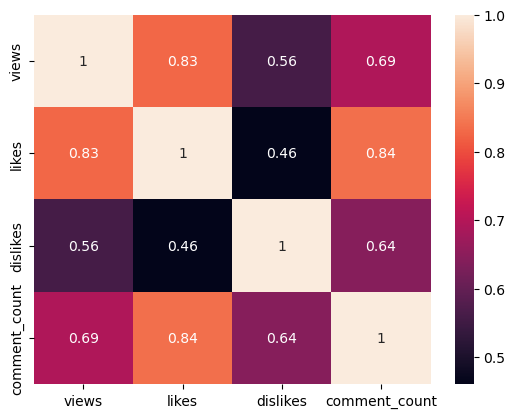

In [41]:
print(df[['views', 'likes', 'dislikes','comment_count']].describe())

# Correlation matrix
corr_matrix = df[['views', 'likes', 'dislikes','comment_count']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

All the 4 varibales Views,likes,dislikes and comment count are positivly correlated. It means that as one variable increases, the others also tend to increase.